# **Part 1 - CNN for image classification**

 **Load & split the dataset into training, validation, and testing subsets:**

In [27]:
from __future__ import print_function
import os
import numpy as np

In [28]:
from keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

batch_size = 128
num_classes = 10
epochs = 20

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Split the dataset into training, validation, and testing subsets
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

img_rows, img_cols, channels = 32, 32, 3

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, channels)
val_images = val_images.reshape(val_images.shape[0], img_rows, img_cols, channels)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, channels)

input_shape = (img_rows, img_cols, channels)
print('Train samples:', train_images.shape[0])
print('Validation samples:', val_images.shape[0])
print('Test samples:', test_images.shape[0])


Train samples: 30000
Validation samples: 10000
Test samples: 10000


**Data Modeling**

In [29]:
train_images = train_images.astype("float32")
val_images = val_images.astype("float32")
test_images = test_images.astype("float32")

mean = np.mean(train_images)
std = np.std(train_images)

train_images = (train_images - mean) / std
val_images = (val_images - mean) / std
test_images = (test_images - mean) / std

train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

**Build the CNN model:**

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [38]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(wd)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 10, activation = 'softmax'))


In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_38 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 batch_normalization_38 (Ba  (None, 32, 32, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 activation_39 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 batch_normalization_39 (Ba  (None, 32, 32, 128)       512       
 tchNormalization)                                    

**Train the model for different learning rates:**

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [41]:
lr = 1e-4#learning rate

In [42]:
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your training data (train_images, train_labels)
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))



Epoch 1/20
938/938 [==============================] - 36s 33ms/step - loss: 2.4188 - accuracy: 0.2161 - val_loss: 1.9429 - val_accuracy: 0.3437
Epoch 2/20
938/938 [==============================] - 30s 32ms/step - loss: 1.9839 - accuracy: 0.3364 - val_loss: 1.7399 - val_accuracy: 0.4448
Epoch 3/20
938/938 [==============================] - 30s 32ms/step - loss: 1.7880 - accuracy: 0.4136 - val_loss: 1.5347 - val_accuracy: 0.4981
Epoch 4/20
938/938 [==============================] - 30s 32ms/step - loss: 1.6236 - accuracy: 0.4788 - val_loss: 1.4219 - val_accuracy: 0.5523
Epoch 5/20
938/938 [==============================] - 30s 32ms/step - loss: 1.4796 - accuracy: 0.5339 - val_loss: 1.2944 - val_accuracy: 0.5880
Epoch 6/20
938/938 [==============================] - 30s 32ms/step - loss: 1.3468 - accuracy: 0.5899 - val_loss: 1.2001 - val_accuracy: 0.6436
Epoch 7/20
938/938 [==============================] - 31s 33ms/step - loss: 1.2327 - accuracy: 0.6289 - val_loss: 1.0911 - val_accuracy:

313/313 [==============================] - 3s 9ms/step - loss: 0.7037 - accuracy: 0.8247
Test Loss: 0.7037457823753357
Test Accuracy: 0.8246999979019165
313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
[[820   5  61   9  23   1   9   5  37  38]
 [ 12 830   4   2   3   4  10   2  36 123]
 [ 40   0 795  26  69  37  46   3   6   0]
 [ 23   1  58 648  61 146  52  10  17   4]
 [ 11   0  44  22 843  11  23  15   1   0]
 [  8   0  26 126  52 748  23  14   3   3]
 [  3   0  33  21   7   7 913   1   4   1]
 [  9   1  23  23  78  43   6 797   3   5]
 [ 21   3   7   0   1   1   8   0 905  14]
 [ 14   8   5   5   5   5   8   1  14 948]]
Precision: 0.8291471202306647
Recall: 0.8257919290086237
Accuracy: 0.8247


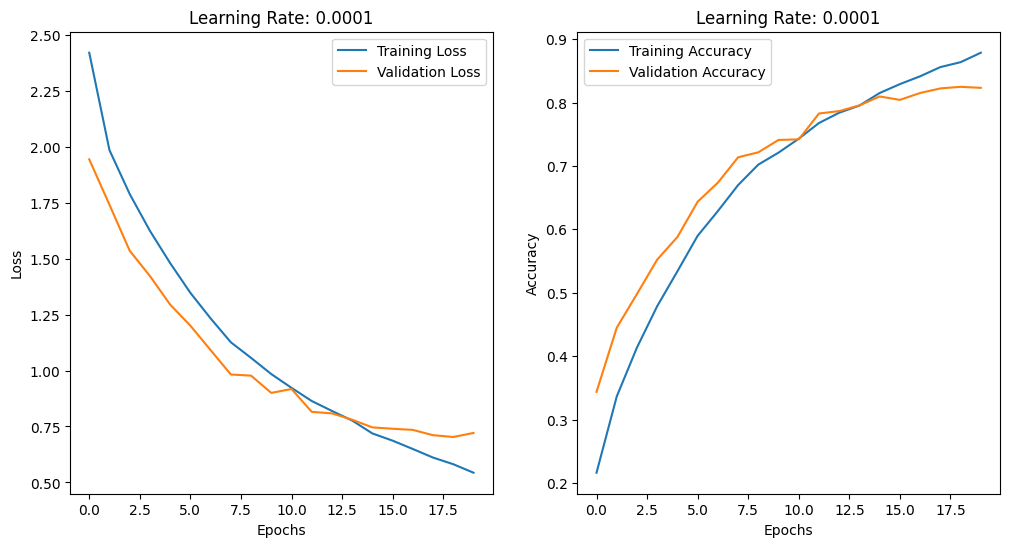

In [43]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate test predictions
test_predictions = model.predict(test_images)
test_labels = np.argmax(test_labels, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

plt.show()


In [44]:
lr = 1e-3#learning rate

In [45]:
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your training data (train_images, train_labels)
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
938/938 [==============================] - 35s 33ms/step - loss: 1.5040 - accuracy: 0.6091 - val_loss: 1.3434 - val_accuracy: 0.6571
Epoch 2/20
938/938 [==============================] - 33s 35ms/step - loss: 1.3917 - accuracy: 0.6776 - val_loss: 1.2946 - val_accuracy: 0.7212
Epoch 3/20
938/938 [==============================] - 31s 33ms/step - loss: 1.4146 - accuracy: 0.7089 - val_loss: 1.3854 - val_accuracy: 0.7311
Epoch 4/20
938/938 [==============================] - 30s 32ms/step - loss: 1.4520 - accuracy: 0.7303 - val_loss: 1.4259 - val_accuracy: 0.7459
Epoch 5/20
938/938 [==============================] - 30s 32ms/step - loss: 1.5269 - accuracy: 0.7369 - val_loss: 1.5838 - val_accuracy: 0.7368
Epoch 6/20
938/938 [==============================] - 30s 32ms/step - loss: 1.5643 - accuracy: 0.7574 - val_loss: 1.5711 - val_accuracy: 0.7564
Epoch 7/20
938/938 [==============================] - 30s 32ms/step - loss: 1.6162 - accuracy: 0.7644 - val_loss: 1.6770 - val_accuracy:

313/313 [==============================] - 3s 8ms/step - loss: 3.4548 - accuracy: 0.1008
Test Loss: 3.4547579288482666
Test Accuracy: 0.10080000013113022
313/313 [==============================] - 2s 7ms/step
Confusion Matrix:
[[1008    0    0    0    0    0    0    0    0    0]
 [1026    0    0    0    0    0    0    0    0    0]
 [1022    0    0    0    0    0    0    0    0    0]
 [1020    0    0    0    0    0    0    0    0    0]
 [ 970    0    0    0    0    0    0    0    0    0]
 [1003    0    0    0    0    0    0    0    0    0]
 [ 990    0    0    0    0    0    0    0    0    0]
 [ 988    0    0    0    0    0    0    0    0    0]
 [ 960    0    0    0    0    0    0    0    0    0]
 [1013    0    0    0    0    0    0    0    0    0]]
Precision: 0.01008
Recall: 0.1
Accuracy: 0.1008


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


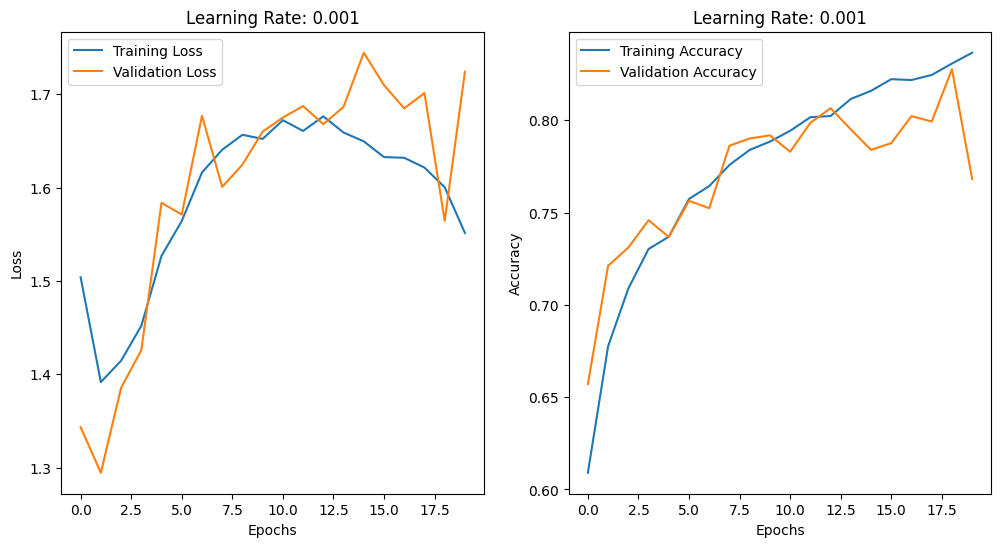

In [46]:
# Ensure test_images and test_labels are in the correct shape
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, channels)
test_labels = to_categorical(test_labels, num_classes)

# Preprocess the test data (mean subtraction and standardization)
test_images = (test_images - mean) / std

# Verify the number of classes in test_labels
assert test_labels.shape[1] == num_classes, "Number of classes in test_labels should match num_classes."

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


# Generate test predictions
test_predictions = model.predict(test_images)
test_labels = np.argmax(test_labels, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

plt.show()

In [47]:
lr = 1e-2#learning rate

In [48]:
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your training data (train_images, train_labels)
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))



Epoch 1/20
938/938 [==============================] - 34s 33ms/step - loss: 3.1115 - accuracy: 0.1116 - val_loss: 2.3811 - val_accuracy: 0.0974
Epoch 2/20
938/938 [==============================] - 30s 32ms/step - loss: 2.4357 - accuracy: 0.0989 - val_loss: 2.4697 - val_accuracy: 0.1030
Epoch 3/20
938/938 [==============================] - 30s 32ms/step - loss: 2.7891 - accuracy: 0.0975 - val_loss: 3.5230 - val_accuracy: 0.0974
Epoch 4/20
938/938 [==============================] - 29s 31ms/step - loss: 3.6070 - accuracy: 0.1010 - val_loss: 3.4343 - val_accuracy: 0.0953
Epoch 5/20
938/938 [==============================] - 30s 32ms/step - loss: 3.0254 - accuracy: 0.0989 - val_loss: 2.8311 - val_accuracy: 0.1005
Epoch 6/20
938/938 [==============================] - 30s 32ms/step - loss: 3.5839 - accuracy: 0.0990 - val_loss: 4.5563 - val_accuracy: 0.1005
Epoch 7/20
938/938 [==============================] - 30s 32ms/step - loss: 3.8235 - accuracy: 0.1009 - val_loss: 3.2599 - val_accuracy:

313/313 [==============================] - 3s 8ms/step - loss: 2.3959 - accuracy: 0.1020
Test Loss: 2.395873546600342
Test Accuracy: 0.10199999809265137
313/313 [==============================] - 2s 7ms/step
Confusion Matrix:
[[   0    0    0 1008    0    0    0    0    0    0]
 [   0    0    0 1026    0    0    0    0    0    0]
 [   0    0    0 1022    0    0    0    0    0    0]
 [   0    0    0 1020    0    0    0    0    0    0]
 [   0    0    0  970    0    0    0    0    0    0]
 [   0    0    0 1003    0    0    0    0    0    0]
 [   0    0    0  990    0    0    0    0    0    0]
 [   0    0    0  988    0    0    0    0    0    0]
 [   0    0    0  960    0    0    0    0    0    0]
 [   0    0    0 1013    0    0    0    0    0    0]]
Precision: 0.010199999999999999
Recall: 0.1
Accuracy: 0.102


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


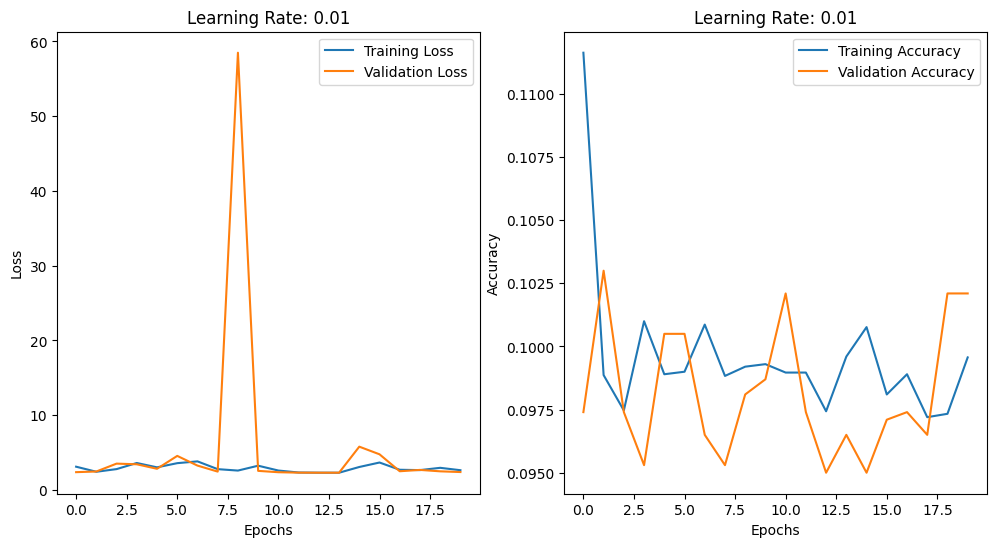

In [49]:
# Ensure test_images and test_labels are in the correct shape
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, channels)
test_labels = to_categorical(test_labels, num_classes)

# Preprocess the test data (mean subtraction and standardization)
test_images = (test_images - mean) / std

# Verify the number of classes in test_labels
assert test_labels.shape[1] == num_classes, "Number of classes in test_labels should match num_classes."

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


# Generate test predictions
test_predictions = model.predict(test_images)
test_labels = np.argmax(test_labels, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

plt.show()

In [50]:
lr = 1e-1#learning rate

In [51]:
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using your training data (train_images, train_labels)
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
938/938 [==============================] - 34s 32ms/step - loss: 2.3168 - accuracy: 0.1000 - val_loss: 2.3344 - val_accuracy: 0.0965
Epoch 2/20
938/938 [==============================] - 30s 32ms/step - loss: 2.3160 - accuracy: 0.1004 - val_loss: 2.3197 - val_accuracy: 0.0953
Epoch 3/20
938/938 [==============================] - 30s 32ms/step - loss: 119.8602 - accuracy: 0.0998 - val_loss: 53.9755 - val_accuracy: 0.0974
Epoch 4/20
938/938 [==============================] - 30s 32ms/step - loss: 57.4638 - accuracy: 0.0991 - val_loss: 43.9757 - val_accuracy: 0.0953
Epoch 5/20
938/938 [==============================] - 30s 32ms/step - loss: 86.2100 - accuracy: 0.0996 - val_loss: 39.2260 - val_accuracy: 0.0974
Epoch 6/20
938/938 [==============================] - 30s 32ms/step - loss: 81.6825 - accuracy: 0.1035 - val_loss: 44.8499 - val_accuracy: 0.0974
Epoch 7/20
938/938 [==============================] - 29s 31ms/step - loss: 116.5301 - accuracy: 0.1037 - val_loss: 87.9302 - v

313/313 [==============================] - 3s 8ms/step - loss: 208.4200 - accuracy: 0.1026
Test Loss: 208.4200439453125
Test Accuracy: 0.10260000079870224
313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
[[   0 1008    0    0    0    0    0    0    0    0]
 [   0 1026    0    0    0    0    0    0    0    0]
 [   0 1022    0    0    0    0    0    0    0    0]
 [   0 1020    0    0    0    0    0    0    0    0]
 [   0  970    0    0    0    0    0    0    0    0]
 [   0 1003    0    0    0    0    0    0    0    0]
 [   0  990    0    0    0    0    0    0    0    0]
 [   0  988    0    0    0    0    0    0    0    0]
 [   0  960    0    0    0    0    0    0    0    0]
 [   0 1013    0    0    0    0    0    0    0    0]]
Precision: 0.01026
Recall: 0.1
Accuracy: 0.1026


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


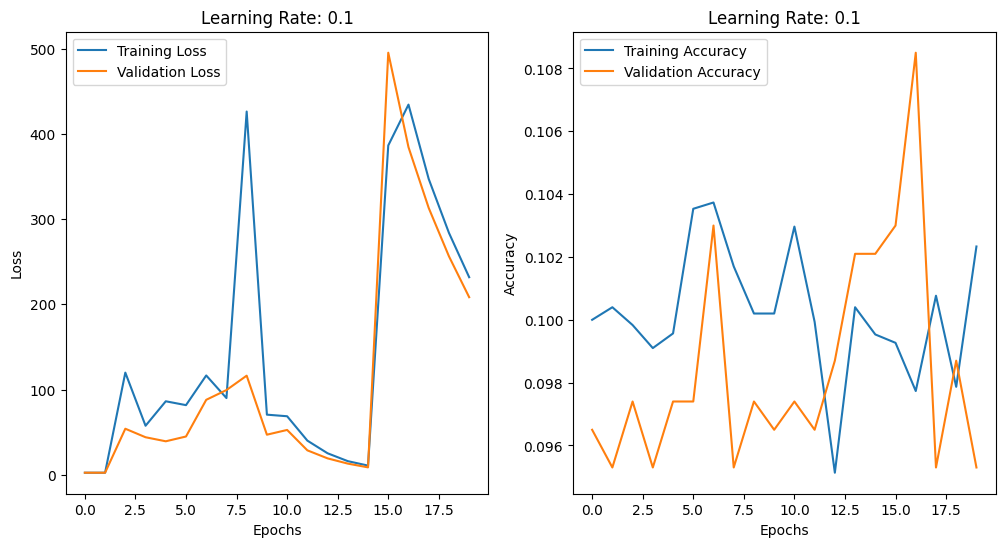

In [52]:
# Ensure test_images and test_labels are in the correct shape
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, channels)
test_labels = to_categorical(test_labels, num_classes)

# Preprocess the test data (mean subtraction and standardization)
test_images = (test_images - mean) / std

# Verify the number of classes in test_labels
assert test_labels.shape[1] == num_classes, "Number of classes in test_labels should match num_classes."

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


# Generate test predictions
test_predictions = model.predict(test_images)
test_labels = np.argmax(test_labels, axis=1)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Learning Rate: {lr}')  # Add a title with the learning rate

plt.show()

# **Part 2 - Comparing the Efficacy of Custom CNN Models and Fine-Tuned Pre-trained Models for CIFAR-10 Classification.**

**ResNet**

Epoch 1/20
1250/1250 [==============================] - 87s 46ms/step - loss: 1.3773 - accuracy: 0.5331 - val_loss: 1.1078 - val_accuracy: 0.6201
Epoch 2/20
1250/1250 [==============================] - 57s 46ms/step - loss: 1.1361 - accuracy: 0.6153 - val_loss: 1.4443 - val_accuracy: 0.5024
Epoch 3/20
1250/1250 [==============================] - 58s 47ms/step - loss: 1.2270 - accuracy: 0.5733 - val_loss: 1.2735 - val_accuracy: 0.5639
Epoch 4/20
1250/1250 [==============================] - 60s 48ms/step - loss: 1.1532 - accuracy: 0.5996 - val_loss: 1.0255 - val_accuracy: 0.6351
Epoch 5/20
1250/1250 [==============================] - 58s 47ms/step - loss: 1.1307 - accuracy: 0.6109 - val_loss: 1.1602 - val_accuracy: 0.5851
Epoch 6/20
1250/1250 [==============================] - 60s 48ms/step - loss: 1.1605 - accuracy: 0.5946 - val_loss: 1.0346 - val_accuracy: 0.6358
Epoch 7/20
1250/1250 [==============================] - 58s 46ms/step - loss: 1.0046 - accuracy: 0.6594 - val_loss: 0.9877 -

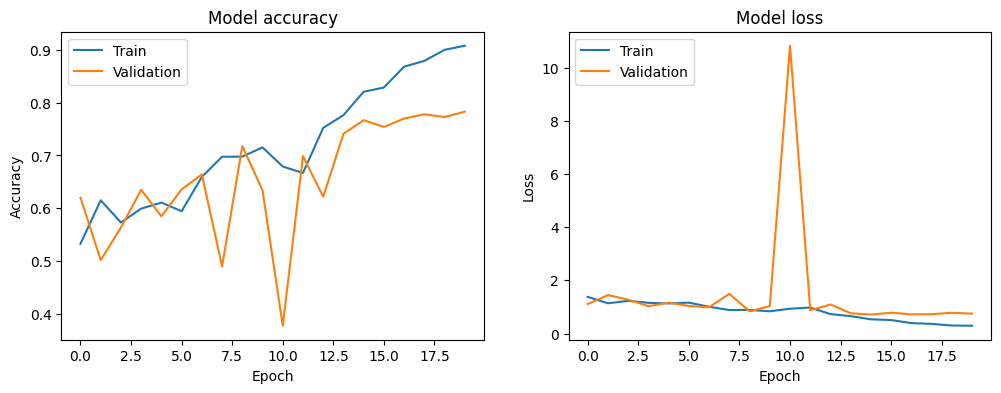

313/313 [==============================] - 4s 14ms/step - loss: 0.7800 - accuracy: 0.7783
ResNet Test Accuracy: 0.7782999873161316
ResNet Test Loss: 0.7800188064575195


In [60]:
# Load pre-trained ResNet model
base_model_resnet = resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x_resnet = base_model_resnet.output
x_resnet = Flatten()(x_resnet)
x_resnet = Dense(256, activation='relu')(x_resnet)
predictions_resnet = Dense(10, activation='softmax')(x_resnet)
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# Compile and train the ResNet model
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_resnet = model_resnet.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('ResNet Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('ResNetModel loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(test_images, test_labels)
print(f"ResNet Test Accuracy: {test_acc_resnet}")
print(f"ResNet Test Loss: {test_loss_resnet}")


**VGG**

Epoch 1/20
1250/1250 [==============================] - 45s 33ms/step - loss: 1.8222 - accuracy: 0.2609 - val_loss: 1.6562 - val_accuracy: 0.3158
Epoch 2/20
1250/1250 [==============================] - 38s 31ms/step - loss: 1.4926 - accuracy: 0.4040 - val_loss: 1.3382 - val_accuracy: 0.4739
Epoch 3/20
1250/1250 [==============================] - 38s 30ms/step - loss: 1.1903 - accuracy: 0.5649 - val_loss: 1.0698 - val_accuracy: 0.6046
Epoch 4/20
1250/1250 [==============================] - 38s 30ms/step - loss: 0.9516 - accuracy: 0.6640 - val_loss: 1.0589 - val_accuracy: 0.6314
Epoch 5/20
1250/1250 [==============================] - 40s 32ms/step - loss: 0.8358 - accuracy: 0.7078 - val_loss: 0.8669 - val_accuracy: 0.7061
Epoch 6/20
1250/1250 [==============================] - 40s 32ms/step - loss: 0.7346 - accuracy: 0.7508 - val_loss: 0.7984 - val_accuracy: 0.7307
Epoch 7/20
1250/1250 [==============================] - 38s 30ms/step - loss: 0.6449 - accuracy: 0.7808 - val_loss: 0.7724 -

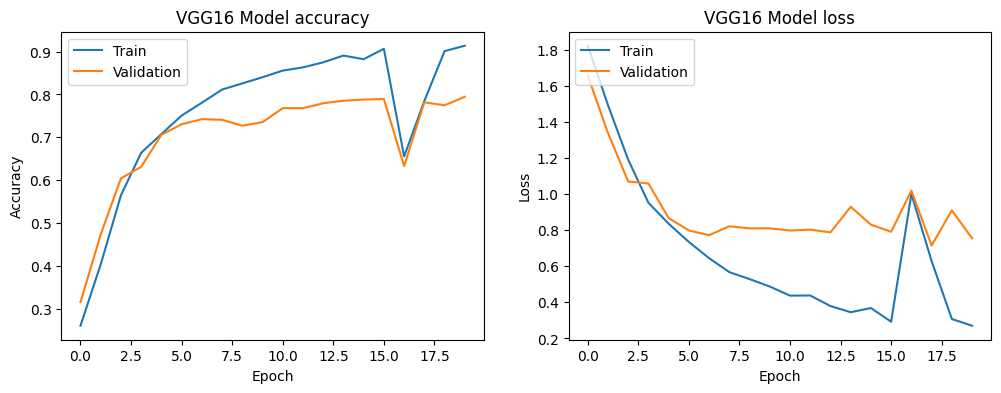

313/313 [==============================] - 3s 10ms/step - loss: 0.7610 - accuracy: 0.7962
VGG16 Test Accuracy: 0.7961999773979187
VGG16 Test Loss: 0.7610194683074951


In [61]:
# Load pre-trained VGG16 model
base_model_vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x_vgg = base_model_vgg.output
x_vgg = Flatten()(x_vgg)
x_vgg = Dense(256, activation='relu')(x_vgg)
predictions_vgg = Dense(10, activation='softmax')(x_vgg)
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions_vgg)

# Compile and train the VGG16 model
model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg = model_vgg.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

# Plot training history for VGG16
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('VGG16 Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the VGG16 model
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(test_images, test_labels)
print(f"VGG16 Test Accuracy: {test_acc_vgg}")
print(f"VGG16 Test Loss: {test_loss_vgg}")
